In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/train_dataset.csv
/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/test_dataset.csv


In [2]:
# Load datasets
train_df = pd.read_csv('/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/train_dataset.csv')
test_df = pd.read_csv('/kaggle/input/tabular-dataset-ready-for-malicious-url-detection/test_dataset.csv')

# Combine train and test datasets for splitting
combined_df = pd.concat([train_df, test_df])

In [3]:
combined_df.shape

(8411061, 60)

In [4]:
combined_df = combined_df.sample(n=4000000, random_state=42)

In [5]:
important_features = [
    'url_len', 'url_entropy', 'url_count_dot', 'url_count_https', 'url_count_http',
    'url_count_hyphen', 'url_count_www', 'url_count_atrate', 'url_count_hash',
    'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp',
    'url_count_letter', 'url_count_digit', 'pdomain_len', 'tld_len', 'subdomain_len',
    'path_len', 'path_count_no_of_dir', 'query_len', 'query_count_components'
]

# Define target variable
target = 'label'

In [6]:
# Split the combined dataset into features and target
X = combined_df[important_features]
y = combined_df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 80],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [8]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 8.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=13.4min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 8.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=13.5min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=15.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=11.9min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 7.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.7min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.9min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time= 7.5min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min

In [9]:
best_rf.fit(X_train, y_train)

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time= 4.6min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 4.8min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time= 7.2min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=13.5min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=21.2min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=20.2min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=17.0min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=10.7min
[CV] END bootstrap=False, max_depth=None, min_samples_lea

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [10]:
# Save the best model and the scaler
joblib.dump(best_rf, 'url_classifier_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Make predictions on the test set to verify the model
y_pred = best_rf.predict(X_test)
print(f'Accuracy on Test Data: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy on Test Data: 0.9232725
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    627510
           1       0.89      0.74      0.81    172490

    accuracy                           0.92    800000
   macro avg       0.91      0.86      0.88    800000
weighted avg       0.92      0.92      0.92    800000



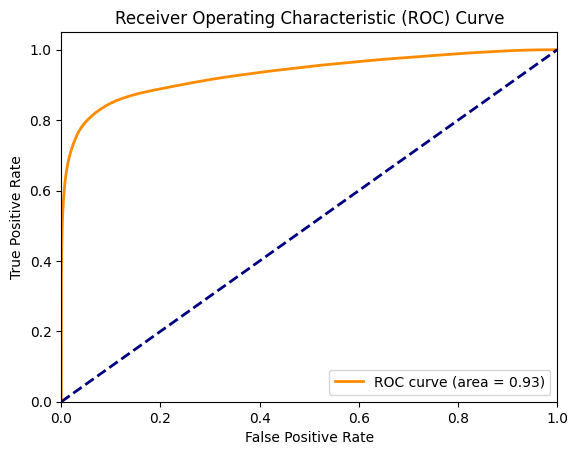

In [12]:
# Compute ROC curve and ROC area
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
!pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.2 MB/s eta 0:00:00


In [15]:
import re
import pandas as pd
import tldextract
from math import log2
from collections import Counter
from urllib.parse import urlparse

def calculate_entropy(url):
    p, lns = Counter(url), float(len(url))
    return -sum(count/lns * log2(count/lns) for count in p.values())

def extract_features(url):
    features = {}

    # Basic URL properties
    features['url_len'] = len(url)
    features['url_entropy'] = calculate_entropy(url)

    # Domain properties
    parsed_url = tldextract.extract(url)
    features['pdomain_len'] = len(parsed_url.domain)
    features['tld_len'] = len(parsed_url.suffix)
    features['subdomain_len'] = len(parsed_url.subdomain)

    # Parse the full URL to get path and query
    parsed_full_url = urlparse(url)
    path = parsed_full_url.path
    query = parsed_full_url.query

    # Count occurrences of certain characters
    features['url_count_dot'] = url.count('.')
    features['url_count_https'] = url.count('https')
    features['url_count_http'] = url.count('http')
    features['url_count_hyphen'] = url.count('-')
    features['url_count_www'] = url.count('www')
    features['url_count_atrate'] = url.count('@')
    features['url_count_hash'] = url.count('#')
    features['url_count_underscore'] = url.count('_')
    features['url_count_ques'] = url.count('?')
    features['url_count_equal'] = url.count('=')
    features['url_count_amp'] = url.count('&')

    # Character properties
    features['url_count_letter'] = sum(c.isalpha() for c in url)
    features['url_count_digit'] = sum(c.isdigit() for c in url)

    # Path properties
    features['path_len'] = len(path)
    features['path_count_no_of_dir'] = path.count('/')

    # Query properties
    features['query_len'] = len(query)
    features['query_count_components'] = query.count('&')

    # Ensure features are in the correct order and all features are present
    feature_order = [
        'url_len', 'url_entropy', 'url_count_dot', 'url_count_https', 'url_count_http',
        'url_count_hyphen', 'url_count_www', 'url_count_atrate', 'url_count_hash',
        'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp',
        'url_count_letter', 'url_count_digit', 'pdomain_len', 'tld_len', 'subdomain_len',
        'path_len', 'path_count_no_of_dir', 'query_len', 'query_count_components'
    ]
    features = {key: features.get(key, 0) for key in feature_order}

    return pd.DataFrame([features])

In [16]:
import joblib

# Load the model and scaler
model = joblib.load('url_classifier_model.pkl')
scaler = joblib.load('scaler.pkl')

def classify_url(url):
    # Extract features
    features_df = extract_features(url)
    
    # Standardize the features
    features_scaled = scaler.transform(features_df)
    
    # Predict
    prediction = model.predict(features_scaled)
    
    # Output the prediction
    return 'Malicious' if prediction[0] == 1 else 'Benign'

# Example usage
new_url = "setups-google.com/"
print(f'The URL "{new_url}" is {classify_url(new_url)}')

The URL "setups-google.com/" is Malicious
